# M. Hareeshwar Reddy
## mogillannolla_h@ch.iitr.ac.in

In [1]:
import requests
import datetime
import matplotlib.pyplot as plt
import time

# Reading the data from the APIs

In [2]:
#coins considered for trading
coins = ["BTC", "ETH", "ADA", "SOL", "POL"]

#function to get the data of a coin stored in the dictionary
def get_data(currency):
    response = requests.get("https://min-api.cryptocompare.com/data/v2/histoday?fsym={}&tsym=USD&limit=1095".format(currency))
    data = response.json()['Data']['Data']
    return data

BTC_data = get_data("BTC")
ETH_data = get_data("ETH")
ADA_data = get_data("ADA")
SOL_data = get_data("SOL")
POL_data = get_data("POL")

#storing data in a dictionary with key values named after the currency
data = {'BTC_data':BTC_data, 'ETH_data':ETH_data, 'ADA_data':ADA_data, 'SOL_data':SOL_data, 'POL_data':POL_data}

In [3]:
#function to get the 30day return of a currency
def price_ret(currency, index):
    return (data["{}_data".format(currency)][index-1]['close']/data["{}_data".format(currency)][index-30]['close'])-1

In [4]:
#ranking coins based on their 30 day returns
def rank_coins(coins,index):
    coins.sort(key=lambda coin: price_ret(coin,index), reverse=True)
    return coins

In [5]:
# def monthly_plan(coins, index):
#     coins = rank_coins(coins, index)
#     new_month_portfolio = {'balance': 0, 'quantity':{'POL':0, 'BTC':0, 'ETH':0, 'SOL':0, 'ADA':0}}
#     new_month_portfolio['quantity'] = portfolio[len(portfolio)-1]['quantity'].copy()
#     new_month_portfolio['quantity'] = portfolio[len(portfolio)-1]['balance']
#     new_month_portfolio[coins[0]] += 1
#     if new_month_portfolio[coins[4]] != 0: new_month_portfolio[coins[4]] = 0
#     portfolio.append(new_month_portfolio)

In [6]:
# portfolio variable to store the cash in hand, quantity of coins in account, and the time of the day
portfolio = [{'balance': 0, 'time': 1609459200,'quantity':{'POL':0, 'BTC':0, 'ETH':0, 'SOL':0, 'ADA':0}}]

# Function to execute the monthly plan

###  At the end of every month we analyse the last 30 day returns to  buy the top ranked coin and sell the bottom ranked coin with the available balance + 10000USD of new added investment 

In [7]:
def monthly_plan_execute(coins, index):
    coins = rank_coins(coins, index)
    new_month_portfolio = {'balance': 0,'time': 0, 'quantity':{'POL':0, 'BTC':0, 'ETH':0, 'SOL':0, 'ADA':0}}
    new_month_portfolio['balance'] = portfolio[len(portfolio)-1]['balance']
    new_month_portfolio['quantity'] = portfolio[len(portfolio)-1]['quantity'].copy()
    new_month_portfolio['time'] = BTC_data[i]['time']
    #adding 10000 USD to the trading account
    balance = new_month_portfolio['balance']+10000
    new_qty = balance/data['{}_data'.format(coins[0])][index]['close']
    new_month_portfolio['balance'] = 0
    new_month_portfolio['quantity'][coins[0]] += new_qty
    if new_month_portfolio['quantity'][coins[4]] != 0:
        price = data['{}_data'.format(coins[4])][index]['close']
        new_month_portfolio['balance'] += (price*new_month_portfolio['quantity'][coins[4]])
        new_month_portfolio['quantity'][coins[4]] = 0
    portfolio.append(new_month_portfolio)

In [8]:
# Execting the monthly plan on month ends
curr = datetime.datetime(2021, 1, 1) #storing the month start
nxt_mnth = curr.replace(day=28) + datetime.timedelta(days=4) 
next_date = (nxt_mnth - datetime.timedelta(days=nxt_mnth.day)) #storing the month end date
curr = next_date+datetime.timedelta(days=1) #storing the start date of the next month
for i in range(601,len(BTC_data)):
    new_date = time.gmtime(BTC_data[i]['time'])
    #executing the monthly plan at month ends
    if datetime.datetime(new_date.tm_year, new_date.tm_mon, new_date.tm_mday) == next_date:
        monthly_plan_execute(coins, i)
        nxt_mnth = curr.replace(day=28) + datetime.timedelta(days=4)
        next_date = (nxt_mnth - datetime.timedelta(days=nxt_mnth.day))
        curr = next_date+datetime.timedelta(days=1)

In [9]:
#function to get the price of a currency at a given time 
def get_price(time, currency):
    return data['{}_data'.format(currency)][int((time-1560124800)/86400)-1]['close']

In [10]:
#storing the portfolio values in terms of BTC
portfolio_value = []
time_axis = []
for ele in portfolio:
    amt = ele['balance']
    for (key) in ele['quantity']:
        amt += (get_price(ele['time'], key)*ele['quantity'][key])
    portfolio_value.append(amt/get_price(ele['time'], 'BTC'))
    date = time.gmtime(ele['time'])
    time_axis.append(str(date.tm_mon)+'/'+str(date.tm_year)[-2:])

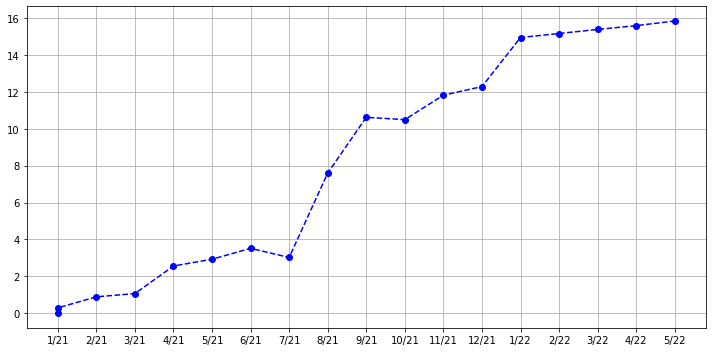

In [11]:
#plotting the Values
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
plt.plot(time_axis,portfolio_value, '--bo')
plt.grid()
plt.show()

### In the above investment stratergy we are depending on the data of the day we trade and 30 days previous to that.
### We have neglected the the remaining days and have not considered them for trading which is not thr right thing to do as we culd have lost a potential gains in that period.
### As we know that crypto market is open 24/7 and the value of the coins is volatile. To take the maximum advantage of this volatility we must always keep an eye out for the market. 
### During the time we are not trading there might be news released which will affect the value and we might have to bear the brunt of our stratergy.
### We are not doing any of the technical analysis which should be the basis of any trade that we do. This considers the state of the market and helps us to get the trades more accurate.
### The strategy we used above has worked only because the market in the stipualated time was always seeing new highs and peeks on every front, but this will not be the case every year.

In [12]:
# total investment
print("Total investment:", len(portfolio_value)*10000)

Total investment: 180000


In [13]:
# final portfolio value
print("Final Portfolio Value:", portfolio_value[len(portfolio_value)-1]*get_price(portfolio[len(portfolio)-1]['time'], 'BTC'))

Final Portfolio Value: 502642.41657520307


In [14]:
#Total profit
print("Total profit:", portfolio_value[len(portfolio_value)-1]*get_price(portfolio[len(portfolio)-1]['time'], 'BTC')-len(portfolio_value)*10000)

Total profit: 322642.41657520307


### Though the returns seem nice and the investment had bought in huge profits, that is not the maximum profit that one could achieve from the same amount of investment during the same time.
### We have calculated the coin with high returns and invested all of the available balance in that coin, which is not a good practice in the long run.
### There is a saying that "we should not put all eggs in one basket", similarly we should diversify our investment into various coins to avoid losing them all.
### The investment should also consider the upcoming trends along with the future of these coins